In [44]:
import sys
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import types


# Load Data

try:
	file_path = '/Users/JH/Documents/GitHub/EnergyData_jhyun/VTT/VTT_GW1_HA2_VM_EP_KV_K.bin'
		#sys.argv[1]
except IndexError as err:
	print('IndexError: ' + str(err))
	print('Usage: python parsing <filename>')
	exit()

In [45]:
data = pickle.load(open(file_path))
time_stamp = data['ts']
value = data['value']

print(time_stamp)
print(value)

[[datetime.datetime(2013, 5, 15, 10, 37, 23) 23 37 ..., 2 15 5]
 [datetime.datetime(2013, 5, 15, 10, 42, 30) 30 42 ..., 2 15 5]
 [datetime.datetime(2013, 5, 15, 10, 47, 30) 30 47 ..., 2 15 5]
 ..., 
 [datetime.datetime(2015, 6, 30, 0, 46, 32) 32 46 ..., 1 30 6]
 [datetime.datetime(2015, 6, 30, 0, 51, 32) 32 51 ..., 1 30 6]
 [datetime.datetime(2015, 6, 30, 0, 56, 32) 32 56 ..., 1 30 6]]
[     0.      0.      0. ...,  20065.  20065.  20065.]


In [46]:
x, y = [], []

for line in time_stamp:
	x.append(line[0])

for line in value:
	y.append(line)

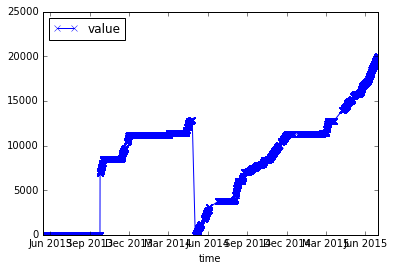

In [47]:
plt.plot(x,y,linestyle = '-', marker = 'x', label = "value")

plt.xlabel('time')
plt.legend(loc = 2)
plt.show()

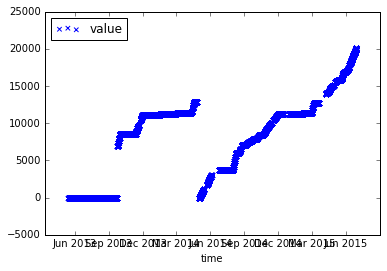

In [48]:
plt.scatter(x, y, marker = 'x', label = "value")

plt.xlabel('time')
plt.legend(loc = 2)
plt.show()

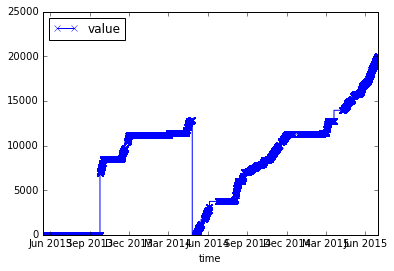

In [49]:
plt.step(x, y, marker = 'x', label = "value")

plt.xlabel('time')
plt.legend(loc = 2)
plt.show()

In [50]:
for i in range(0, 20):
	print(x[i]),
	print('\t value: %d' %y[i])

2013-05-15 10:37:23 	 value: 0
2013-05-15 10:42:30 	 value: 0
2013-05-15 10:47:30 	 value: 0
2013-05-15 10:52:30 	 value: 0
2013-05-15 10:57:31 	 value: 0
2013-05-15 11:02:41 	 value: 0
2013-05-15 11:07:41 	 value: 0
2013-05-15 11:12:41 	 value: 0
2013-05-15 11:17:41 	 value: 0
2013-05-15 11:22:41 	 value: 0
2013-05-15 11:27:41 	 value: 0
2013-05-15 11:32:51 	 value: 0
2013-05-15 11:37:51 	 value: 0
2013-05-15 11:42:51 	 value: 0
2013-05-15 11:47:51 	 value: 0
2013-05-15 11:52:51 	 value: 0
2013-05-15 11:57:51 	 value: 0
2013-05-15 12:02:51 	 value: 0
2013-05-15 12:07:51 	 value: 0
2013-05-15 12:12:51 	 value: 0


In [51]:
type(x[0])

datetime.datetime

In [52]:
print(x[0].year)
print(x[0].month)
print(x[0].day)
print(x[0].hour)
print(x[0].minute)
print(x[0].second)

2013
5
15
10
37
23


In [53]:
x_trim, y_trim = [], []

In [54]:
x[0].minute

37

In [58]:
# minute -> time_stamp[i][2]
x_trim.append(x[0])
x_trim[0]

datetime.datetime(2013, 5, 15, 10, 37, 23)

In [61]:
x_trim[0] = x_trim[0].replace(minute=10)
x_trim[0]

datetime.datetime(2013, 5, 15, 10, 10, 23)

In [64]:
minute_checker = 0
index = 0
item = 0

for i in range(0, len(x)):
    if x[i].minute/10 == minute_checker:
        item +=1
        y_trim[index] += y[i]
    else:
        x_trim.append(x[i])
        x_trim[0] = x_trim[0].replace(minute=minute_checker)
        minute_checker +=1
        if minute_checker == 6:
            minute_checker = 0
            
        y_trim[index] = y_trim[index]/item
        item = 0
        
        

IndexError: list index out of range